##Análisis Bivariado

###Realizar un pequeño análisis bivariado de datos, teniendo en cuenta las características de las observaciones. Generar al menos 3 gráficos asociados.

####Link al Dataset

Los datos los obtuvimos del siguiente [link](https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv)

##¿Qué buscamos mediante el análisis bivariado?

En términos generales, el análisis bivariado es la investigación de la relación entre dos conjuntos de datos, como pares de observaciones tomadas de una misma muestra o individuo.

###Definición del problema

**Contexto**

Con el rápido desarrollo de la insdutria de la telecomunicación e incremento de la copetencia, se ha vuelto un desafío ampliar la base de usuarios y retener los existentes. Como es sabido, es más costosa la adquisición de nuevos usuarios que la retención de existentes. Es en este contexto que se vuelve fundamental aplicar analítica avanzada para predecir la posibilidad de que un cliente pueda abandonar la empresa e identificarlo antes de que su decisión este tomada y poder revertir la situación.

Librerías que utilizaremos

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
import warnings
import ipywidgets as widgets
import missingno as msno
!pip install sidetable
import sidetable
from pandas.api.types import is_numeric_dtype
from pandas.core.frame import DataFrame
from prettytable import PrettyTable
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#Función para pasar a minúsculas los string de una lista o array:
def to_lowercase(arr):
 new_arr = []
 for x in list(range(0,len(arr))):
   new = arr[x].lower()
   new_arr.append(new)
 return new_arr

In [78]:
#Función para gráficos entre variables categóricas y numéricas:
def graph_cat_num(var_cat,var_num):
  fig, ax = plt.subplots(1,3,figsize=(30,10))
  p_1=sns.boxplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[0])
  str_title='Relación entre {} y {}'.format(var_cat,var_num)
  p_1.set_title(str_title,size=20, loc= 'center')
  
  p_2=sns.violinplot(data=df,x=var_cat,y=var_num,hue=var_cat,ax=ax[1])

  p_3=sns.kdeplot(data=df,x=var_num,hue=var_cat,ax=ax[2])
  return

In [79]:
#Función para gráficos entre 2 variables categóricas:
def graph_cat_cat(var_x,var_hue):

  fig, ax = plt.subplots(1,2,figsize=(50,50))

  #Gráfico bar para ver freq de una categórica y agrupación según otra categórica:
  ex=sns.countplot(data=df,x=var_x,hue=var_hue,order=df[var_x].value_counts().index,ax=ax[0])
  ex.set_xticklabels(ex.get_xticklabels(),rotation=90);

  #Gráfico stacked-bar con porcentajes para ver la dist de una variable en las categorias:
  cross = pd.crosstab(df[var_hue] , df[var_x])
  columnas = cross.columns
  len_index = len(cross.index)
  dict_cross={}
  for col in columnas:
   total = cross[col].values.sum()
   val_cols =[]
   for index in range(0,len_index):
     valor = round(cross[col][index]/total,2)
     val_cols.append(valor)
     dict_cross[col]=val_cols
  
  pd.DataFrame(dict_cross,index=cross.index).T.plot(kind="bar", stacked=True, rot=90, figsize=(10,6), ax=ax[1]);
  print()
  tabla_dict = pd.DataFrame(dict_cross,index=cross.index).T
  print(f'Frecuencia según variable {var_hue}. (Cada fila suma 1)')
  if var_hue == 'churn':
    display(tabla_dict.sort_values('Yes',ascending=False))
  else:
    display(tabla_dict.sort_values(tabla_dict.columns[0],ascending=False))
  print()
  print(f'Frecuencia absoluta de cada categoria de la variable {var_x}')
  display(pd.DataFrame(df[var_x].value_counts()))
  print()
  return

In [80]:
#Determinamos cuántas columnas y rows queremos que nos muestre por defecto:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

Carga del DataSet agregando o eliminando las columnas que sean necesarias

In [81]:
data=pd.read_csv("https://raw.githubusercontent.com/johanjohnson/DataCleaning---ChurnDataSet/main/churn_raw_data.csv")
df=pd.DataFrame(data)
df.drop(['Unnamed: 0','CaseOrder','Customer_id', 'Interaction',],axis=1,inplace=True)
df.head()

,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


Definición de las columnas del Dataset:

Son datos demográficos, de comportamiento, opinión, consumo y facturación de los clientes. 

A continuación, se describe cada columna del Dataset: 

### Descripcion de Variables

Una de las primeras cosas que uno debe verificar es qué tipo de datos tengo. 

Inicialmente es poder revisar qué tipos de columnas tiene el dataset.

***Object (28)*** 

1. Customer_id: ID del Cliente
2. Interaction: Identificaciones únicas relacionadas con transacciones de clientes, soporte técnico e inscripciones
3. City: Ciudad de residencia del cliente que figura en el estado de cuenta
4. State: Estado de residencia del cliente como se indica en el estado de cuenta
5. County: Condado de residencia del cliente como se indica en el estado de cuenta
6. Area: Tipo de área (rural, urbana, suburbana), según datos del censo
7. Timezone: Zona horaria de residencia del cliente basada en la información de registro del cliente
8. Job: Ocupación del cliente como se indica en la información de registro
9. Education: Grado de educación más alto obtenido por el cliente según lo declarado en la información de registro
10. Employment: Estado de empleo del cliente según lo declarado en la información de registro
11. Marital: Estado civil del cliente según lo indicado en la información de registro
12. Gender: Autopercepción del cliente como hombre, mujer o no binario
13. Churn: : El cliente interrumpió el servicio en el último mes (sí/no)
14. Techie: El cliente se considera tecnológico (según el cuestionario del cliente cuando se inscribió en los servicios) (sí/no)
15. Contract: Plazo del contrato del cliente (mes a mes, un año, dos años)
16. Port_modem: El cliente tiene un módem portátil (sí/no)
17. Tablet: El cliente posee una tableta como iPad, Surface, etc. (sí/no)
18. InternetService: Proveedor de servicios de Internet del cliente (DSL, fibra óptica, Ninguno)
19. Phone: El cliente tiene servicio telefónico (sí/no)
20. Multiple: El cliente tiene varias líneas (sí/no)
21. OnlineSecurity: El cliente tiene un complemento de seguridad online (sí/no)
22. OnlineBackup: El cliente tiene un complemento de copia de seguridad online (sí/no)
23. DeviceProtection: El cliente tiene un complemento de protección de dispositivos (sí/no)
24. TechSupport: El cliente tiene un complemento de soporte técnico (sí/no)
25. StreamingTV: El cliente tiene servicio de transmisión de TV (sí/no)
26. StreamingMovies: El cliente tiene películas en streaming (sí/no)
27. PaperlessBilling: El cliente tiene facturación electrónica (sí/no)
28. PaymentMethod: Método de pago del cliente (cheque electrónico, cheque enviado por correo, banco (transferencia bancaria automática), tarjeta de crédito (automática))


***Int64 (14)***

 1. CaseOrder: Variable de marcador de posición para conservar el orden original del archivo de datos sin procesar
 2. Zip: Código Postal de residencia del cliente que figura en el estado de cuenta
 3. Population: Población dentro de un radio de una milla del cliente, según datos del censo
 4. Email: Cantidad de correos electrónicos enviados al cliente en el último año (marketing o correspondencia)
 5. Contacts: Número de veces que el cliente se comunicó con el soporte técnico
 6. Yearly_equip_failure: Cantidad de veces que el equipo del cliente falló y tuvo que reiniciarse/reemplazarse en el último año

Las siguientes variables, representan las respuestas a una encuesta de ocho preguntas, en las que se pide a los clientes que califiquen la importancia de varios factores en una escala del 1 al 8 (1 = más importante, 8 = menos importante):

7. Item1: Respuesta oportuna
8. Item2: Reparaciones oportunas
9. Item3: Reemplazos oportunos
10. Item4: Fiabilidad
11. Item5: Opciones
12. Item6: Respuesta respetuosa
13. Item7: Intercambio cortés
14. Item8: Evidencia de escucha activa


***Float64 (9)***

1. Lat: Coordenada de latitud de la residencia del cliente (GPS), que figura en el estado de cuenta
2. Lng: Coordenada de longitud de la residencia del cliente (GPS), que figura en el estado de cuenta
3. Children: Cantidad de niños en el hogar del cliente según lo informado en el registro
4. Age: Edad del cliente según lo informado en el registro
5. Income: Ingreso anual del cliente según lo informado en el momento del registro
6. Outage_sec_perweek: Promedio de segundos por semana de interrupciones del sistema en el vecindario del cliente
7. Tenure: Número de meses que el cliente se ha quedado con el proveedor
8. MonthlyCharge: Importe cobrado al cliente mensualmente. Este valor refleja un promedio por cliente
9. Bandwidth_GB_Year: Cantidad promedio de datos utilizados (GB), en un año por el cliente

In [82]:
#Guardamos datos originales en una tabla de backup por si necesitamos recuperar rápido los datos

original = df

In [83]:
#Pasamos a minúsculas los string a una lista o array::
col_names = to_lowercase(df.columns.values)

df.set_axis(col_names,axis='columns',inplace=True)

df.columns.values

array(['city', 'state', 'county', 'zip', 'lat', 'lng', 'population',
       'area', 'timezone', 'job', 'children', 'age', 'education',
       'employment', 'income', 'marital', 'gender', 'churn',
       'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
       'techie', 'contract', 'port_modem', 'tablet', 'internetservice',
       'phone', 'multiple', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'paymentmethod', 'tenure',
       'monthlycharge', 'bandwidth_gb_year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'], dtype=object)

In [84]:
#Totalizamos los resultados de las Encuestas (Items 1 a 8):
df['total_encuesta']=df.item1.values+df.item2.values+df.item3.values+df.item4.values+df.item5.values+df.item6.values+df.item7.values+df.item8.values
df['total_encuesta']

0       33
1       28
2       27
3       29
4       32
        ..
9995    23
9996    34
9997    33
9998    33
9999    21
Name: total_encuesta, Length: 10000, dtype: int64

In [85]:
#Cambiamos los nombres de las últimas columnas reemplazando itemx por el nombre del item:

factores_items = {'item1': 'timely_response', 
                  'item2': 'timely_fixes', 
                  'item3': 'timely_replacements', 
                  'item4': 'reliability', 
                  'item5': 'options',
                  'item6': 'respectful_response',
                  'item7': 'courteous_exchange',
                  'item8': 'active_listening'}

df.rename(columns=factores_items, inplace=True)

df.head(2)

,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,total_encuesta
0,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,33
1,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,28


In [86]:
#Considerams que si tiene múltiples línaea telefónicas ("multiple"), debería tener "Yes" en "phone":
for index in df.phone.index:
  if df.phone.isna()[index]==True & (df.multiple[index]=='Yes')==True:
    df.phone[index]='Yes'
  else:
   'nada'

In [87]:
df[(df.multiple=='Yes') & (df.phone.isna())].head()

,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment,income,marital,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internetservice,phone,multiple,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,tenure,monthlycharge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening,total_encuesta


In [88]:
#Totalizamos la cantidad de Servicios por cliente:
df['q_online_serv'] = df.internetservice.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinesecurity.apply(lambda x: 1 if x == 'Yes' else 0).values + df.onlinebackup.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_phone_serv']=df.phone.apply(lambda x: 1 if x == 'Yes' else 0).values+df.deviceprotection.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_other_serv']= df.techsupport.apply(lambda x: 1 if x == 'Yes' else 0).values + df.streamingtv.apply(lambda x: 1 if x == 'Yes' else 0).values + df.streamingmovies.apply(lambda x: 1 if x == 'Yes' else 0).values
df['q_total_serv']=df['q_online_serv'].values+df['q_phone_serv'].values+df['q_other_serv'].values

df[['q_online_serv','q_phone_serv','q_other_serv','q_total_serv']]

,q_online_serv,q_phone_serv,q_other_serv,q_total_serv
0,2,1,1,4
1,1,1,2,4
2,0,1,1,2
3,1,1,1,3
4,0,0,2,2
...,...,...,...,...
9995,1,2,0,3
9996,2,2,1,5
9997,2,1,0,3
9998,0,0,3,3


In [89]:
#Agregamos variables string que se correspondan con las numéricas categóricas para el análisis de variables categóricas:
df['children_cat'] = df['children'].apply(lambda x: str(x))
df['age_cat'] = df['age'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['zip_cat'] = df['zip'].apply(lambda x: str(x))
df['pop_cat'] = df['population'].apply(lambda x: str(x))
df['email_cat'] = df['zip'].apply(lambda x: str(x))
df['contacts_cat'] = df['contacts'].apply(lambda x: str(x))
df['failure_cat'] = df['yearly_equip_failure'].apply(lambda x: str(x))
df['timely_response_cat'] = df['timely_response'].apply(lambda x: str(x))
df['timely_fixes_cat'] = df['timely_fixes'].apply(lambda x: str(x))
df['timely_replacements_cat'] = df['timely_replacements'].apply(lambda x: str(x))
df['reliability_cat'] = df['reliability'].apply(lambda x: str(x))
df['options_cat'] = df['options'].apply(lambda x: str(x))
df['respectful_response_cat'] = df['respectful_response'].apply(lambda x: str(x))
df['courteous_exchange_cat'] = df['courteous_exchange'].apply(lambda x: str(x))
df['active_listening_cat'] = df['active_listening'].apply(lambda x: str(x))
df['total_encuesta_cat'] = df['total_encuesta'].apply(lambda x: str(x))

df['q_online_serv_cat'] = df['q_online_serv'].apply(lambda x: str(x))
df['q_phone_serv_cat'] = df['q_phone_serv'].apply(lambda x: str(x))
df['q_other_serv_cat'] = df['q_other_serv'].apply(lambda x: str(x))
df['q_total_serv_cat'] = df['q_total_serv'].apply(lambda x: str(x))

cols_arr = df.columns.values
cols_arr = cols_arr.astype('str')

#validamos que se agregaron correctamentes las variables:
df[cols_arr[np.char.endswith(cols_arr, '_cat')]].head()

,children_cat,age_cat,zip_cat,pop_cat,email_cat,contacts_cat,failure_cat,timely_response_cat,timely_fixes_cat,timely_replacements_cat,reliability_cat,options_cat,respectful_response_cat,courteous_exchange_cat,active_listening_cat,total_encuesta_cat,q_online_serv_cat,q_phone_serv_cat,q_other_serv_cat,q_total_serv_cat
0,nan,68.0,99927,38,99927,0,1,5,5,5,3,4,4,3,4,33,2,1,1,4
1,1.0,27.0,48661,10446,48661,0,1,3,4,3,3,4,3,4,4,28,1,1,2,4
2,4.0,50.0,97148,3735,97148,0,1,4,4,2,4,4,3,3,3,27,0,1,1,2
3,1.0,48.0,92014,13863,92014,2,0,4,4,4,2,5,4,3,3,29,1,1,1,3
4,0.0,83.0,77461,11352,77461,2,1,4,4,4,3,4,4,4,5,32,0,0,2,2


In [90]:
#Convertimos los "Yes" y "No" de churn en "1" y "0" respectivamente:
df['churn_bool']=df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['churn_bool']

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: churn_bool, Length: 10000, dtype: int64

Verificación de forma del conjunto de datos

In [91]:
print(f'La cantidad de columnas del dataset de Churn son {df.shape[1]} y {df.shape[0]} filas')

La cantidad de columnas del dataset de Churn son 74 y 10000 filas


### Datos Básicos

Cálculo de información estadística y genérica de cada columna de un dataframe: En lugar de utilizar el ".describe", con esta función obtendremos mayor grado de detalle

In [92]:
def univariado_info(df):
  '''Cálculo de información estadística y genérica de cada columna de un dataframe'''

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])

  for col in df:

      data_series = df[col]
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([df_info,pd.concat([df_describe, df_stats], axis=1)], axis=1).fillna('-')

df_uni_stats = univariado_info(df)
df_uni_stats

,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
city,10000,object,0,6058,False,Houston,-,-,-,-,-,-,-,-,-
state,10000,object,0,52,False,TX,-,-,-,-,-,-,-,-,-
county,10000,object,0,1620,False,Washington,-,-,-,-,-,-,-,-,-
zip,10000,int64,0,8583,True,-,49153.3196,27532.196108,601.0,26292.5,48869.5,71866.5,99929.0,0.071069,-1.063105
lat,10000,float64,0,8563,True,-,38.757567,5.437389,17.96612,35.341828,39.3958,42.106908,70.64066,0.077977,2.991702
lng,10000,float64,0,8655,True,-,-90.782536,15.156142,-171.68815,-97.082812,-87.9188,-80.088745,-65.66785,-1.336513,2.605296
population,10000,int64,0,5933,True,-,9756.5624,14432.698671,0.0,738.0,2910.5,13168.0,111850.0,2.205008,5.516785
area,10000,object,0,3,False,Suburban,-,-,-,-,-,-,-,-,-
timezone,10000,object,0,25,False,America/New_York,-,-,-,-,-,-,-,-,-
job,10000,object,0,639,False,Occupational psychologist,-,-,-,-,-,-,-,-,-


In [93]:
#Ver resumen del datatypes que arroja el .info():
df.dtypes.value_counts()

object     46
int64      19
float64     9
dtype: int64

In [94]:
# Con PrettyTable, genero una función que realiza una tabla resumen de los campos del dataset:

def df_explore(df):

    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])
    
    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ]) 
    print(t)
    print()
    return

df_explore(df)

Shape:  (10000, 74)
+-------------------------+---------+----------+-------+--------+-----------------------------------+
|          Column         |   Type  | Non-Null | Nulls | Unique |              Example              |
+-------------------------+---------+----------+-------+--------+-----------------------------------+
|           city          |  object |  10000   |   0   |  6058  |            Point Baker            |
|          state          |  object |  10000   |   0   |   52   |                 AK                |
|          county         |  object |  10000   |   0   |  1620  |       Prince of Wales-Hyder       |
|           zip           |  int64  |  10000   |   0   |  8583  |               99927               |
|           lat           | float64 |  10000   |   0   |  8563  |               56.251              |
|           lng           | float64 |  10000   |   0   |  8655  |             -133.37571            |
|        population       |  int64  |  10000   |   0   |  5932

Identificación de variables Numéricas y Categóricas

In [95]:
num_columns = df.select_dtypes(include = ["number"]).columns
cat_columns = df.select_dtypes(include = ["object"]).columns

In [96]:
#Variables Numéricas:
num_columns

Index(['zip', 'lat', 'lng', 'population', 'children', 'age', 'income',
       'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
       'tenure', 'monthlycharge', 'bandwidth_gb_year', 'timely_response',
       'timely_fixes', 'timely_replacements', 'reliability', 'options',
       'respectful_response', 'courteous_exchange', 'active_listening',
       'total_encuesta', 'q_online_serv', 'q_phone_serv', 'q_other_serv',
       'q_total_serv', 'churn_bool'],
      dtype='object')

In [97]:
#Variables Categóricas:
cat_columns


Index(['city', 'state', 'county', 'area', 'timezone', 'job', 'education',
       'employment', 'marital', 'gender', 'churn', 'techie', 'contract',
       'port_modem', 'tablet', 'internetservice', 'phone', 'multiple',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'paymentmethod',
       'children_cat', 'age_cat', 'zip_cat', 'pop_cat', 'email_cat',
       'contacts_cat', 'failure_cat', 'timely_response_cat',
       'timely_fixes_cat', 'timely_replacements_cat', 'reliability_cat',
       'options_cat', 'respectful_response_cat', 'courteous_exchange_cat',
       'active_listening_cat', 'total_encuesta_cat', 'q_online_serv_cat',
       'q_phone_serv_cat', 'q_other_serv_cat', 'q_total_serv_cat'],
      dtype='object')

##Análisis relaciones con Variable Objetivo: Churn 

Decidimos hacer primero el análisis de la relación entre la variable objetivo y el resto de las variables, ya que esta es la variable principal de nuestro proyecto y consideramos que debe tener un tratamiento especial en el análisis.

####Variable Target vs Numéricas

In [98]:
churn_corr = df.corr('spearman')['churn_bool'].sort_values(ascending=False)
churn_corr[(churn_corr>0.20) | (churn_corr<-0.20)]

churn_bool           1.000000
monthlycharge        0.360729
q_other_serv         0.317917
q_total_serv         0.249451
bandwidth_gb_year   -0.391243
tenure              -0.467972
Name: churn_bool, dtype: float64

In [99]:
var_cat = widgets.Dropdown(options=['churn'],
                      value = 'churn',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=no_cat_col,
                      value = 'monthlycharge',
                      description = 'Num Col Name')

ui = widgets.HBox([var_num])

out = widgets.interactive_output(graph_cat_num, {'var_cat': var_cat,'var_num': var_num})

display(ui, out)

Output()

**Observaciones:**

Hay varias variables que tienen comportamiento similar para churn y no-churn, por lo que vamos a nombrar aquellas que presenten alguna diferencia.

* Tenure: La mayoría de los churn se concentran en personas con tenure más baja de 30. Hay outliers en los clientes más antiguos, pero en general esos clientes se quedan. La mediana de los churn y no churn es muy distinta, al igual que su dispersión. Correlación churn_bool y tenure de -0.46. Concentrado en los que tienen 20, mediana de 10 aprox. Se hace una buena fidelización?--> Ver esto en los monthly(tipo de contrato). Multivariado, cruzarlo con los contratos.

* Monthlycharge: Podemos ver que quienes abandonan tienen una mediana más elevada y su rango intercuartilico tambien se ubica en valores mayores que quienes no abandonan, pero su dispersión es mayor, teniendo una distribución más uniforme. su correlación es positiva de 0.367. Pueden ser personas que contraten más servicios o servicios más caros? Hay outliers con altos pagos mensuales en los que se quedan, es importante ver qué tipo de servicio estaran contratando estas personas.

* bandwith_gb_year: A menor bandwith hay más churn, puede ser que los servicios que brinda la empresa no funcionen bien con poco bandwith o que los clientes no usen mucho los servicios? corr -0.44. Las personas que usan menos gb son mayores?? Porque hay poca gente que usa 3000-3500? Los que se quedan tienen algún comportamiento especial? Han dejado de usar los servicios?? Los que se quedan consumen mucho porque tienen muchos servicios contratados?

* q_other_serv: La mayoría de quienes contratan otros servicios (tech support o streaming) abandonan. (También lo vemos en la parte de categóricas)

* q_total_serv: Quienes tienen 1 o 2 servicios abandonan menos que quienes tienen mas servicios. (También lo vemos en la parte de categóricas). Porqué abandona alguien que tiene muchos servicios? Le es fácil cambiarlos? Que tipos de servicios son los que tienen?

Variable Target vs Categóricas

In [100]:
#Seleccionamos las variables que tengan 15 o menos categorias para el análisis
cat_cols_graph=[]
cat_cols= df.select_dtypes(include='O').columns
for col in cat_cols :
      if col=='churn':
        continue
      elif df.select_dtypes(include='O')[col].nunique() <= 15:
        cat_cols_graph.append(col)
      else:
        continue

In [101]:
cat_cols_graph

['area',
 'education',
 'employment',
 'marital',
 'gender',
 'techie',
 'contract',
 'port_modem',
 'tablet',
 'internetservice',
 'phone',
 'multiple',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'paymentmethod',
 'children_cat',
 'contacts_cat',
 'failure_cat',
 'timely_response_cat',
 'timely_fixes_cat',
 'timely_replacements_cat',
 'reliability_cat',
 'options_cat',
 'respectful_response_cat',
 'courteous_exchange_cat',
 'active_listening_cat',
 'q_online_serv_cat',
 'q_phone_serv_cat',
 'q_other_serv_cat',
 'q_total_serv_cat']

In [102]:
var_hue = widgets.Dropdown(options=['churn'],
                      value = 'churn',
                      description = 'Cat Col Name')

var_x = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat Col Name')

ui = widgets.HBox([var_x])

out = widgets.interactive_output(graph_cat_cat, {'var_x': var_x ,'var_hue': var_hue})

display(ui, out)

Output()

**Conclusiones:**

A continuación haremos mención de aquellas categorias en las que encontramos algún comportamiento diferente en cuanto al abandono (churn): 

* **Education**: Hay algunas categorias de educación que tienen mayor porcentaje de churn que otras, aunque son similares (dif de 7 puntos porcentuales entre la que mas y menos churn tiene) 
Es significativa una dif de 7 puntos porcentuales? Depende el servicio?

* Quienes se reconocieron como **Techie** tienen un 34% de churn, mientras que aquellos que no son techie tienen 25% de churn. Cambia dependiendo el servicio??

* **Month-to-month** contract presenta un porcentaje más elevado de churn, superando ampliamente a quienes contrataron servicios de un año y dos años. Esto puede deberse a que los contratos de uno y dos años son pagados por adelantado, por lo que la persona decidira abandonar o no la empresa después de pasado el tiempo del contrato, vale la pena agregar a esta comparación el tenure. Pregunta: El abandono sigue siendo menor dsp de superado el tiempo del  contrato? Ej. Alguien que contrato por un año, abandona dsp de 12 meses o decide continuar por lo general? Varia segun servicio que contratan?

* **Internet service**: quienes contratan DSL tienen mayor abandono 32% vs 24% y 23% de las otras categorias. Depende del área donde viven? Depende la edad de la persona??

* **Phone**: Quienes contratan servicios de teléfono tienen 4 puntos porcentuales menos de abandono que quienes no lo contratan. Es significativo?

* **Multiple**: Quienes contratan más de una linea de teléfono abandonan más (33% vs 21%) Porqué puede ser?

* **Onlinebackup y  deviceprotection**: 29% de quienes tienen el servicio abandonan vs 24% si no tienen ese servicio. Es significativo?

* **Streamingtv y streamingmovies**: quienes contratan servicios de streaming tienen un porcentaje más elevado de abandono. MUY SIGNIFICATIVO

* **Children**: El porcentaje de personas que abandonan es diferente según la cantidad de hijos. La categoria con mayor churn es 5 con 30% mientras que 9 tiene 20%. Quienes tienen 6 o más hijos estan entre los que menos abandonan.

* **Contacts**: El 67% de quienes contactaron 7 veces a technical support abandonaron. Si bien solo 3 clientes forman parte de la categoría, tiene sentido que si alguien se queja reiteradamente abandone. Más adelante podemos también agregar en el análisis la variable tenure, ya que no es lo mismo tener 3 quejas en 40 meses que 3 quejas en 3 meses. Esto cambia la percepción de la persona sobre el servicio.

* **Failure (Yearly_equip_failure)**: Tiene un comportamiento raro, quienes más fallas presentaron no abandonaron. Puede ser que sean clientes muy leales o esten en zonas donde no pueden conseguir otro servicio? O fallas menores?

* En las variables que corresponden a la encuesta, quienes calificaron la pregunta en las últimas opciones (7/8) no tuvieron churn, salvo para active listening donde 7 y 6 son categorias con más churn. Para Total_encuesta, haciendo 10 bins podemos ver algunas diferencias.

* **q_other_serv_cat**: Churn aumenta a medida que aumentan la cantidad de estos servicios que se contratan. (Guarda relación con punto 7 y 8)

* **q_total_serv**: Churn aumenta a medida que la persona contrata más servicios.

####Análisis entre las distintas variables del Dataframe

Variables Numéricas vs Numéricas

In [103]:
#Armar df con las variables que tengan correlación mayor a 0.5 o menor a -0.50:
corr_table = df.corr('spearman')
corr_table = corr_table[((corr_table>=0.50)|(corr_table<=-0.50)) & (corr_table!=1.00000)]
corr_table = corr_table.dropna(how='all').dropna(how='all',axis=1)

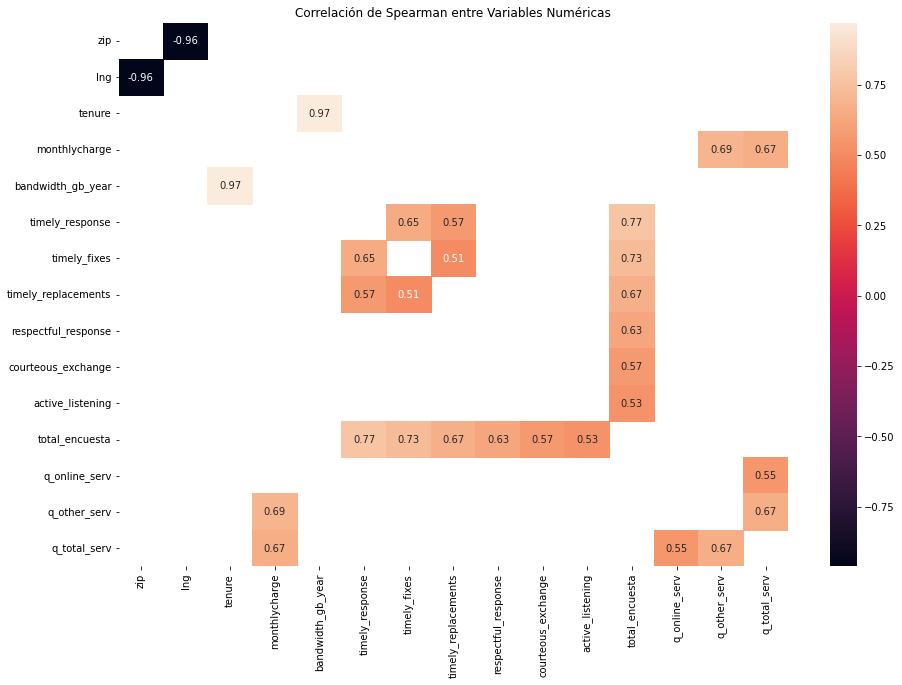

In [104]:
fig, corr_plot = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(corr_table, annot=True,ax=corr_plot).set(title='Correlación de Spearman entre Variables Numéricas');

In [105]:
corr_cols = corr_table.columns[2:]
corr_cols

Index(['tenure', 'monthlycharge', 'bandwidth_gb_year', 'timely_response',
       'timely_fixes', 'timely_replacements', 'respectful_response',
       'courteous_exchange', 'active_listening', 'total_encuesta',
       'q_online_serv', 'q_other_serv', 'q_total_serv'],
      dtype='object')

In [106]:
#Encontramos las mismas correlaciones en la Tabla de Threshold:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .5)

x = df.corr('spearman')
y = x[((x >= 0.5) | (x <= -0.5)) & (x !=1.000)]

y.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()

,level_0,level_1,0
2,tenure,bandwidth_gb_year,0.969566
7,timely_response,total_encuesta,0.767495
9,timely_fixes,total_encuesta,0.725603
3,monthlycharge,q_other_serv,0.694151
10,timely_replacements,total_encuesta,0.672545
15,q_other_serv,q_total_serv,0.666357
4,monthlycharge,q_total_serv,0.665884
5,timely_response,timely_fixes,0.650164
11,respectful_response,total_encuesta,0.627864
12,courteous_exchange,total_encuesta,0.569263


<Figure size 1008x1008 with 0 Axes>

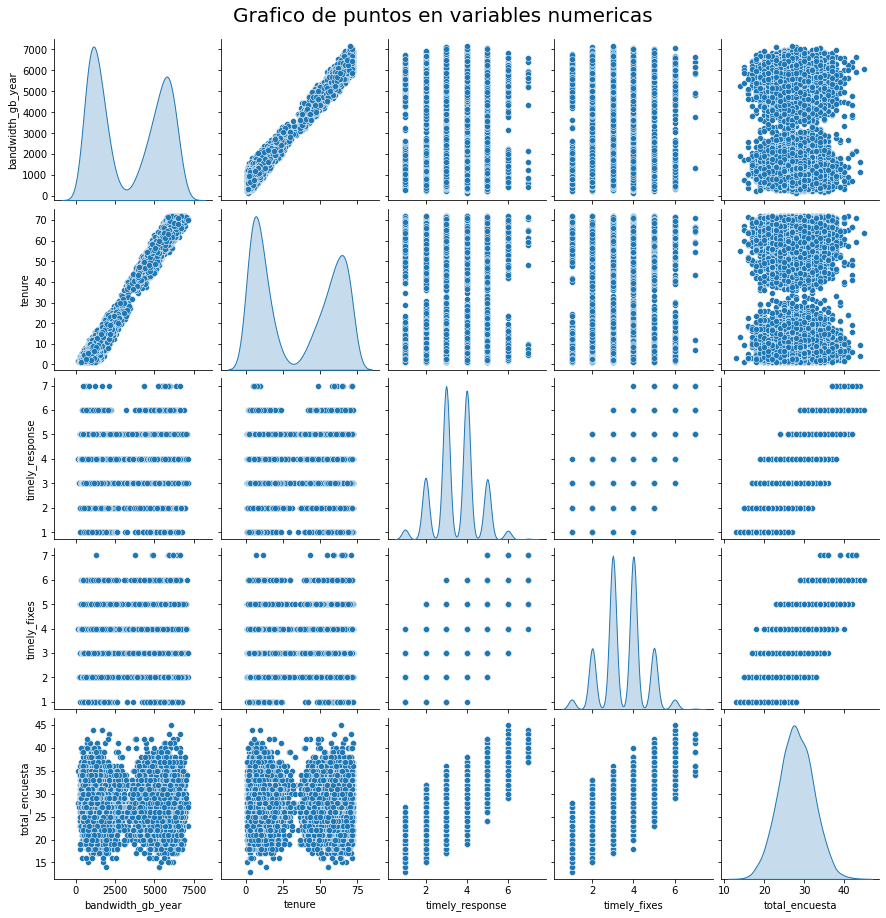

In [107]:
#Graficamos las variables numéricas que más se relacionan en conjunto de puntos:
plt.figure(figsize=(14, 14))

g = sns.pairplot(df[['bandwidth_gb_year', 'tenure', 'timely_response', 'timely_fixes', 'total_encuesta']], diag_kind='kde');
g.fig.suptitle("Grafico de puntos en variables numericas", fontsize=20, y=1.02);

In [117]:
corr_vars = corr_table.unstack().dropna().drop_duplicates().reset_index()
corr_vars

,level_0,level_1,0
0,zip,lng,-0.961663
1,tenure,bandwidth_gb_year,0.969566
2,monthlycharge,q_other_serv,0.694151
3,monthlycharge,q_total_serv,0.665884
4,timely_response,timely_fixes,0.650164
5,timely_response,timely_replacements,0.565265
6,timely_response,total_encuesta,0.767495
7,timely_fixes,timely_replacements,0.505998
8,timely_fixes,total_encuesta,0.725603
9,timely_replacements,total_encuesta,0.672545


In [116]:
  corr_vars = corr_table.unstack().dropna().drop_duplicates().reset_index()
  corr_vars['level_0']

0                     zip
1                  tenure
2           monthlycharge
3           monthlycharge
4         timely_response
5         timely_response
6         timely_response
7            timely_fixes
8            timely_fixes
9     timely_replacements
10    respectful_response
11     courteous_exchange
12       active_listening
13          q_online_serv
14           q_other_serv
Name: level_0, dtype: object

In [110]:
#jointplot para las variables que tienen correlación mayor a 0.5
def plot_corr_table(index):
  var_x = corr_vars['level_0'][index]
  var_y = corr_vars['level_1'][index]
  sns.jointplot(x = var_x, y= var_y, data=df)
  return

In [111]:
var_index = widgets.IntSlider(
              value=0,
              min=0,
              max=max(corr_vars.index),
              step=1,
              description='índice:',
              disabled=False,
              continuous_update=False,
              orientation='horizontal',
              readout=True,
              readout_format='d')

intro = 'Se han detectado un total de {} correlaciones de valor absoluto 0.5 o mayor. Elegir el número de índice y se mostrará la correlación existente entre distintas variables '.format(len(corr_vars.index))
def texto_variables(index_value):
  variables = 'La variable {} y {} tienen una correlación de {}'.format(corr_vars['level_0'][index_value], corr_vars['level_1'][index_value],round(corr_vars[0][index_value],2))
  print(variables)
  print()
  return

ui = widgets.HBox([var_index])

out_1 = widgets.interactive_output(texto_variables, {'index_value':var_index})
out_2 = widgets.interactive_output(plot_corr_table, {'index':var_index})

display(intro,ui,out_1,out_2)

'Se han detectado un total de 15 correlaciones de valor absoluto 0.5 o mayor. Elegir el número de índice y se mostrará la correlación existente entre distintas variables '

Output()

Output()

**Observaciones:**

En términos generales no hay correlaciones significativas entre variables numéricas. Muchas de las encontradas se deben a que algunas variables se armaron custom a partir de otras variables. ej: valores de encuenstas y valor total de la encuesta.

* zip y lng, la correlación puede estar asociada a cómo se determinan los zip codes en eeuu.

* bandwidth y tenure tienen una correlación fuerte, a qué se puede deber? Hay un límite de bandwith mensual tope? Podemos analizarlo en el multivariado, porque es lo que usan para los servicios.

* Correlación positiva entre cantidad de OTROS servicios y costo, 0.69. También dependera de qué servicios se contraten, pero si podemos observar que a mayor cantidad de OTROS servicios el gasto mínimo es mayor. 

* Mismo caso que arriba con q_total_servicies y monthly charge, `Hay 9 personas que figuran con 0 servicios`

* Hay varias correlaciones entre los valores que le asigna la gente a diferentes aspectos de la encuenta (ver índices 4 al 7) y entre los diferentes valores de la encuesta y total encuesta, lo que es natural ya que este último es un agregado de esos valores.

* La variable q_total_serv se correlaciona con la cantidad de otros servicios y de online services porque deriba de ellas.

Variables Categóricas vs Numéricas

In [112]:
#Tomamos de arriba la lista cat_cols_graph que tenía las variables categóricas con menos de 15 categorias:

cat_cols_graph

#Variables numéricas df.select_dtypes(include='number').columns

num_cols_graph = df.select_dtypes(include='number').columns
num_cols_graph

Index(['zip', 'lat', 'lng', 'population', 'children', 'age', 'income',
       'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
       'tenure', 'monthlycharge', 'bandwidth_gb_year', 'timely_response',
       'timely_fixes', 'timely_replacements', 'reliability', 'options',
       'respectful_response', 'courteous_exchange', 'active_listening',
       'total_encuesta', 'q_online_serv', 'q_phone_serv', 'q_other_serv',
       'q_total_serv', 'churn_bool'],
      dtype='object')

In [113]:
cat_cols_graph

['area',
 'education',
 'employment',
 'marital',
 'gender',
 'techie',
 'contract',
 'port_modem',
 'tablet',
 'internetservice',
 'phone',
 'multiple',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'paymentmethod',
 'children_cat',
 'contacts_cat',
 'failure_cat',
 'timely_response_cat',
 'timely_fixes_cat',
 'timely_replacements_cat',
 'reliability_cat',
 'options_cat',
 'respectful_response_cat',
 'courteous_exchange_cat',
 'active_listening_cat',
 'q_online_serv_cat',
 'q_phone_serv_cat',
 'q_other_serv_cat',
 'q_total_serv_cat']

In [114]:
var_cat = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat Col Name')

no_cat_col = list(df.select_dtypes(include='number').columns)

var_num = widgets.Dropdown(options=num_cols_graph,
                      value = 'monthlycharge',
                      description = 'Num Col Name')

ui_1 = widgets.HBox([var_num])
ui_2 = widgets.HBox([var_cat])

out = widgets.interactive_output(graph_cat_num, {'var_cat': var_cat,'var_num': var_num})

display(ui_1,ui_2,out)

Output()

**Observaciones**

TENURE
* Tenure y contract: Month to month y one year tienen una mediana parecida, alrededor de 30.

* Tenure y port_modem: Los que no tienen modem tienen una mediana menor de tenure

* Tenure internet service: Quienes no tienen internet service tienen una mediana menor

* Tenure y multiple: Quienes tienen multiples lineas tienen una mediana menor

* Tenure con online backup y device protection: Tienen una menor mediana quienes no tienen este servicio, sera pq es un servicio difícil de cambiar?

* Tenure y payment method: quienes pagan con transferencia bancaria tienen una mediana más chica.

* Tenure y contactos: quienes se contactaron 7 veces tienen mayor tenure.

* Quienes tienen online backup tienen mayor tenure.


BANDWIDTH

* vs employment: Su mediana varia de acuerdo con el tipo de trabajo.

* vs gender: Varia un poco la mediana según género.

* Contrato de dos años tiene una mayor mediana.

* Internet service: DSL utiliza más

* Servicio de streaming: Quienes contratan tienen mayor mediana, lo cual es esperado porque son servicios relacionados a videos- 

* payment method: quienes pagan con transferencia bancaria tienen una mediana más chica.

Variables Categóricas vs Ctargóricas

In [115]:
var_hue = widgets.Dropdown(options=cat_cols_graph,
                      value = 'marital',
                      description = 'Cat Hue')

var_x = widgets.Dropdown(options=cat_cols_graph,
                      value = 'area',
                      description = 'Cat X axis')

ui_1 = widgets.HBox([var_x])
ui_2 = widgets.HBox([var_hue])

out = widgets.interactive_output(graph_cat_cat, {'var_x': var_x ,'var_hue': var_hue})

display(ui_1,ui_2, out)

Output()